   CustomerID  Age  Gender  Category      Item  Purchase Amount Purchase Date  \
0           1   70    Male      Toys      Doll           483.88    2024-12-13   
1           2   58    Male     Books  Notebook          1215.81    2025-01-08   
2           3   37  Female     Books  Magazine           664.05    2024-12-29   
3           4   43    Male  Clothing     Jeans          1013.83    2025-01-21   
4           5   69  Female  Clothing     Jeans           513.09    2024-12-24   

   Rating Subscription Status Payment Method Promo Code Used  
0     4.1          Subscribed           Cash              No  
1     4.6          Subscribed           Cash              No  
2     3.5      Non-Subscribed           Cash              No  
3     3.6      Non-Subscribed           Cash              No  
4     4.7      Non-Subscribed           Cash              No  
CustomerID               int64
Age                      int64
Gender                  object
Category                object
Item       

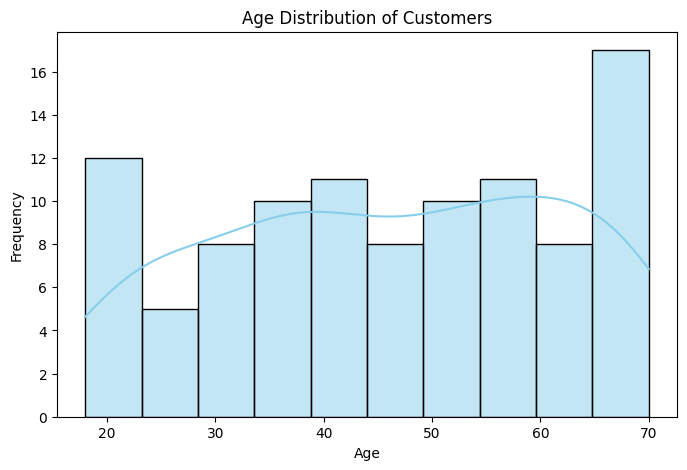

Category
Books          771.818929
Clothing       751.461875
Electronics    702.641250
Groceries      746.360000
Toys           728.346842
Name: Purchase Amount, dtype: float64


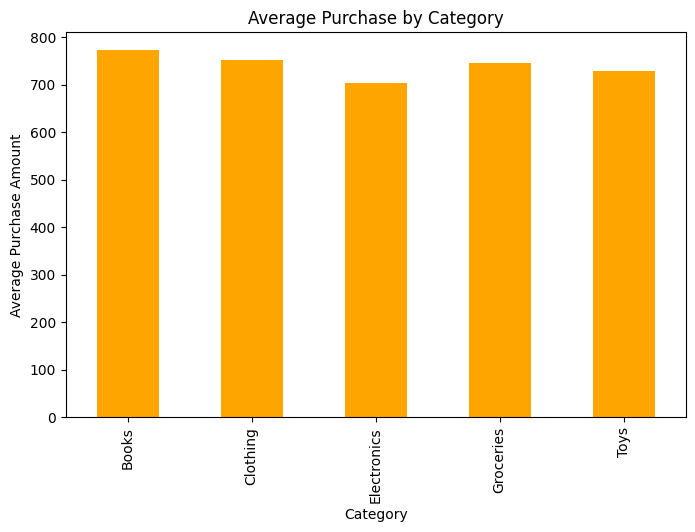

Gender
Female    51
Male      49
Name: count, dtype: int64


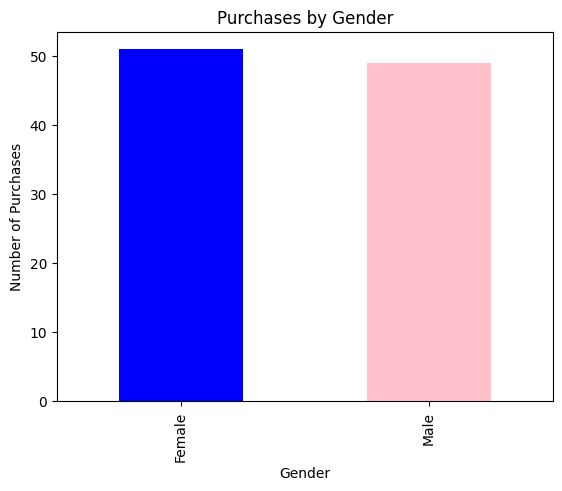

Category     Item      
Books        Comics        6
Clothing     Jeans         5
Electronics  Headphones    5
Groceries    Cheese        6
Toys         Puzzle        6
Name: count, dtype: int64
Month
1     40748.80
12    33639.93
Name: Purchase Amount, dtype: float64


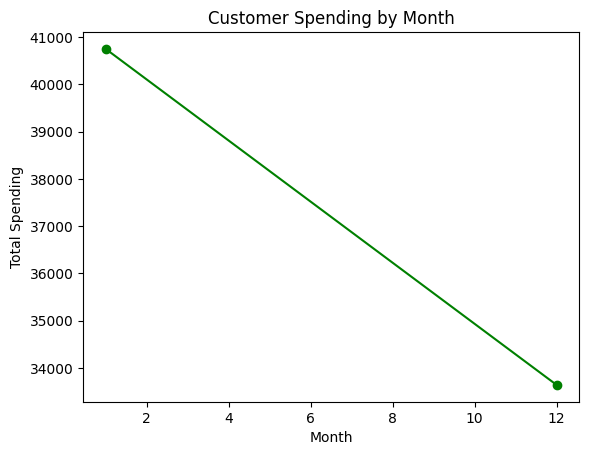

Category
Books          4.225000
Clothing       4.343750
Electronics    4.337500
Groceries      4.266667
Toys           4.047368
Name: Rating, dtype: float64


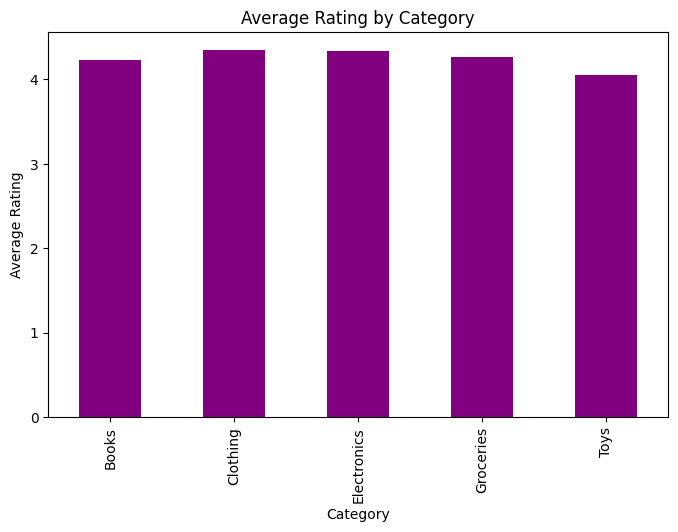

Subscription Status
Non-Subscribed    774.812115
Subscribed        710.385417
Name: Purchase Amount, dtype: float64


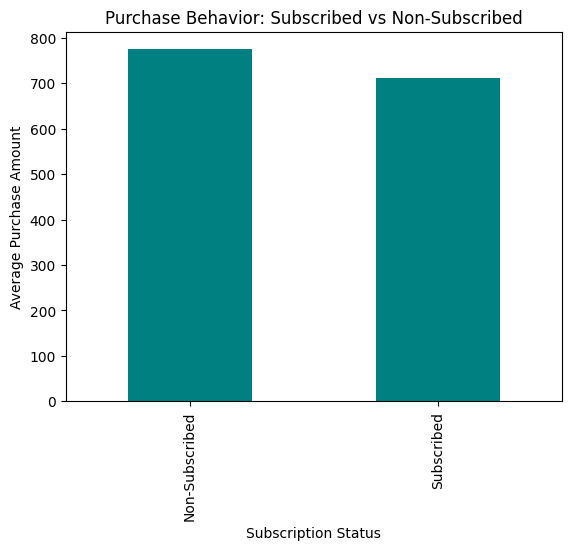

Payment Method
Cash           27
Credit Card    27
UPI            24
Debit Card     22
Name: count, dtype: int64


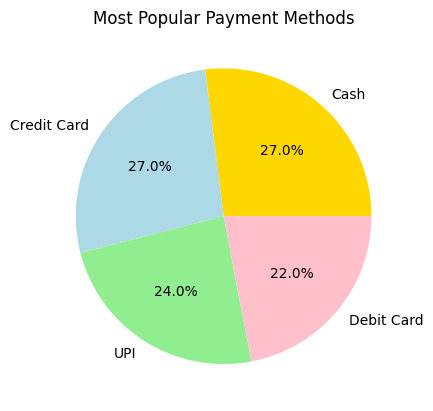

Promo Code Used
No     720.513462
Yes    769.208958
Name: Purchase Amount, dtype: float64


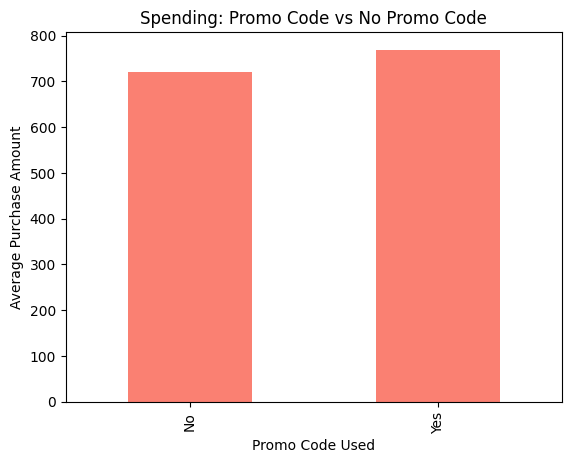

Age
Teen            1
Young Adult    19
Middle-Aged    37
Senior         43
Name: Purchase Amount, dtype: int64


/tmp/ipython-input-2542073351.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = shop.groupby(age_groups)['Purchase Amount'].count()


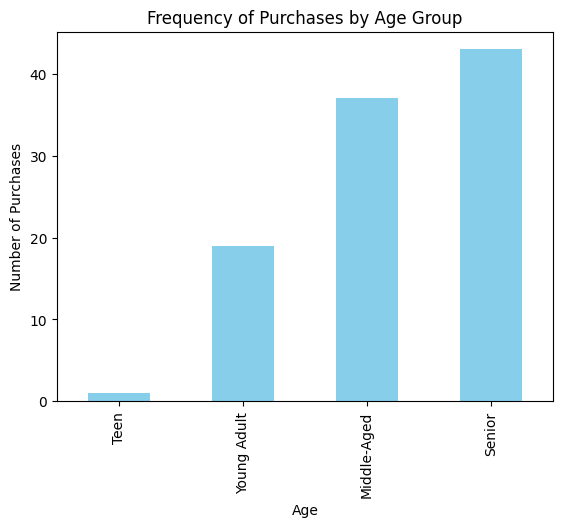

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
file_path = r"/content/shopping_trends_large.csv"
shop = pd.read_csv(file_path)

# Basic info
print(shop.head())
print(shop.dtypes)
print(shop.info())
print(shop.isnull().sum())

# 1. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(shop['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Average purchase amount by category
avg_purchase_by_category = shop.groupby('Category')['Purchase Amount'].mean()
print(avg_purchase_by_category)
avg_purchase_by_category.plot(kind='bar', title='Average Purchase by Category', figsize=(8,5), color='orange')
plt.ylabel('Average Purchase Amount')
plt.show()

# 3. Purchases by gender
gender_purchases = shop['Gender'].value_counts()
print(gender_purchases)
gender_purchases.plot(kind='bar', title='Purchases by Gender', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

# 4. Most commonly purchased items per category
top_items_per_category = shop.groupby('Category')['Item'].value_counts().groupby(level=0).head(1)
print(top_items_per_category)

# 5. Monthly spending trends
shop['Month'] = pd.to_datetime(shop['Purchase Date']).dt.month
monthly_spending = shop.groupby('Month')['Purchase Amount'].sum()
print(monthly_spending)
monthly_spending.plot(kind='line', title='Customer Spending by Month', marker='o', color='green')
plt.ylabel('Total Spending')
plt.show()

# 6. Average rating by category
avg_rating_by_category = shop.groupby('Category')['Rating'].mean()
print(avg_rating_by_category)
avg_rating_by_category.plot(kind='bar', title='Average Rating by Category', figsize=(8,5), color='purple')
plt.ylabel('Average Rating')
plt.show()

# 7. Subscribed vs non-subscribed purchase behavior
subscribed_behavior = shop.groupby('Subscription Status')['Purchase Amount'].mean()
print(subscribed_behavior)
subscribed_behavior.plot(kind='bar', title='Purchase Behavior: Subscribed vs Non-Subscribed', color='teal')
plt.ylabel('Average Purchase Amount')
plt.show()

# 8. Popular payment methods
popular_payment_methods = shop['Payment Method'].value_counts()
print(popular_payment_methods)
popular_payment_methods.plot(kind='pie', autopct='%1.1f%%', title='Most Popular Payment Methods', colors=['gold','lightblue','lightgreen','pink'])
plt.ylabel('')
plt.show()

# 9. Promo code usage effect
promo_vs_no_promo = shop.groupby('Promo Code Used')['Purchase Amount'].mean()
print(promo_vs_no_promo)
promo_vs_no_promo.plot(kind='bar', title='Spending: Promo Code vs No Promo Code', color='salmon')
plt.ylabel('Average Purchase Amount')
plt.show()

# 10. Purchases by age group
age_groups = pd.cut(shop['Age'], bins=[0,18,30,50,70], labels=['Teen', 'Young Adult', 'Middle-Aged', 'Senior'])
age_group_purchases = shop.groupby(age_groups)['Purchase Amount'].count()
print(age_group_purchases)
age_group_purchases.plot(kind='bar', title='Frequency of Purchases by Age Group', color='skyblue')
plt.ylabel('Number of Purchases')
plt.show()
